# Performanse algoritama za CSP

Uporedit cemo performanse nekih algoritama za cutting stock problem. Vektor a predstavlja vrste predmeta na raspolaganju, tj njihovu velicinu. Vektor d predstavlja potraznju. L je velicina pocetnih komada.

Jedan online solver sa kojim mozemo uporediti rezultate ako nismo sigurni
da su tacni je: https://www.opticutter.com/linear-cut-list-calculator.

Neke algoritme koji su poznati i korisni necemo razmatrati. Na primjer branch and price i koristenje Dantzig-Wolfe dekompozicije.

Algoritmi koje cemo razmatrati su:
1. Branch and bound koji smo implementirali i rjesava formulaciju koja koristi cutting konfiguracije
2. Scipy.optimize.linprog funkciju koja rjesava istu fomulaciju kao i 1. algoritam, ali koristi parametar integrality=1. Ovo bi trebala biti neka optimalnija implementacija branch and bound algoritma. Tako da ocekujemo bolje performanse nego 1, ali gore od 3.
3. Column generation (koji rjesava istu formulaciju kao i algoritmi iznad)

In [17]:
from branch_and_bound import csp_branch_and_bound, csp_scipy_integrality, cutting_konfiguracije
from generating_columns import csp_generating_columns , csp_fun_gen_columns
import crtanje
import evaluiraj_algoritme as eval
import numpy as np
from cg_vs_scipy import nacrtaj_cg_fun_razliku

Jedan velik problem kod generisanja svih konfiguracija rezanja je taj sto broj konfiguracija rezanja eksponencijalno raste. Na primjeru ispod dobijamo bas velik broj konfiguracija (uzimajuci da problem idalje nije previse kompleksan).

In [10]:
s = set()
a = [110, 100, 70, 66, 40, 30, 30, 3, 2] # ako dodamo jos 1, 1, definitivno se ceka vise od 10 min, vjerovatno puno vise
L = 300
cutting_konfiguracije(a, L, len(a), s, 0, L, len(a)*(0,))
print(len(s))

19065


Ako iskoristimo neki solver (npr https://www.opticutter.com/linear-cut-list-calculator), dobijamo rjesenje koje koristi samo 7 konfiguracija. Ovo je motivacija za column generation algoritam.

## Pojedinacno mjerenje performansi

### Nas branch and bound

In [11]:
matrica1 = eval.evaluiraj_algoritme(
    [csp_scipy_integrality], 
    d_max=5, 
    L=100,
    n=7,
    broj_iter=12,
    broj_ponavljanja=20,
    n_step=0,
    L_step=10
)

100%|██████████| 12/12 [00:06<00:00,  1.94it/s]


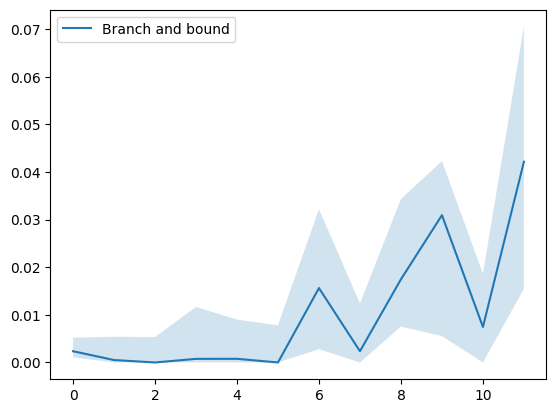

In [12]:
crtanje.crtaj(matrica1, imena_funkcija=["Branch and bound"])

### Scipy.optimize.linprog sa opcijom integrality=1

In [13]:
# np.random.seed(42) # iz nekog razloga seed ne osigurava iste rezultate
matrica2 = eval.evaluiraj_algoritme(
    [csp_scipy_integrality], 
    d_max=5, 
    L=100,
    n=7,
    broj_iter=12,
    broj_ponavljanja=20,
    n_step=0,
    L_step=10
)

100%|██████████| 12/12 [00:04<00:00,  2.96it/s]


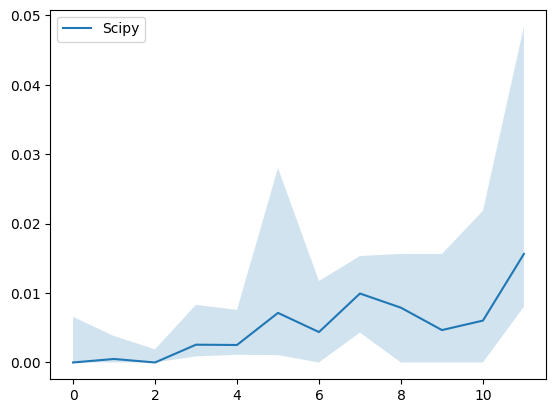

In [14]:
crtanje.crtaj(matrica2, imena_funkcija=["Scipy"])

### Generating columns

In [15]:
matrica3 = eval.evaluiraj_algoritme(
    [csp_fun_gen_columns], # csp_generating_columns ne vraca samo postignutu fun
    d_max=5, 
    L=100,
    n=7,
    broj_iter=12,
    broj_ponavljanja=20,
    n_step=0,
    L_step=10
)

100%|██████████| 12/12 [00:02<00:00,  4.66it/s]


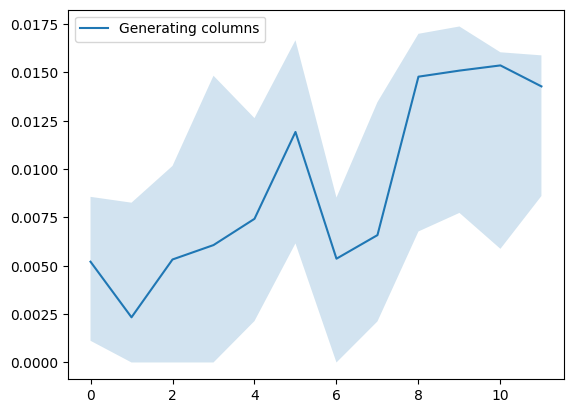

In [16]:
crtanje.crtaj(matrica3, imena_funkcija=["Generating columns"])

## Medjusobno mjerenje performansi

### Koliko dobru aproksimaciju daje column generation?

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


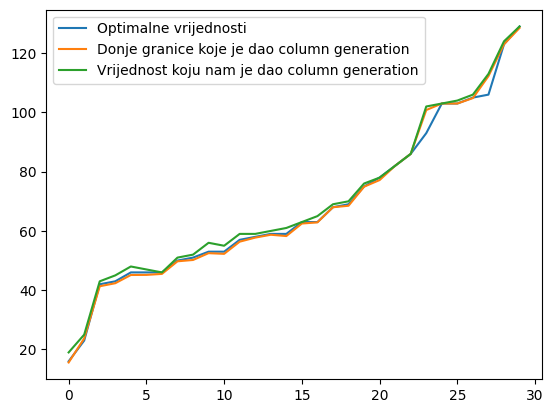

In [18]:
nacrtaj_cg_fun_razliku(d_max=50, L=150, n=7, broj_ponavljanja=30)

Vidimo da column generation daje jako dobru aproksimaciju. Takodjer primijetimo da optimalne vrijednosti ne moraju biti iznad donjih granica, zato sto donje granice nisu koristile sve kolone.